In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Define path to where bank.csv is located
csv_path = '/content/drive/MyDrive/[04] College/[04] Year/SEM 2/CS4168/LAB 3/bank_train_prepared.csv'
df = pd.read_csv(csv_path)
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (2000, 33)


# B. Rescale the Data

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

# C. Scatterplot Function (to be used below for visualising a clustering)

In [60]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):


    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1],
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# Task 2

In [61]:
k = 7

In [62]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [64]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [65]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


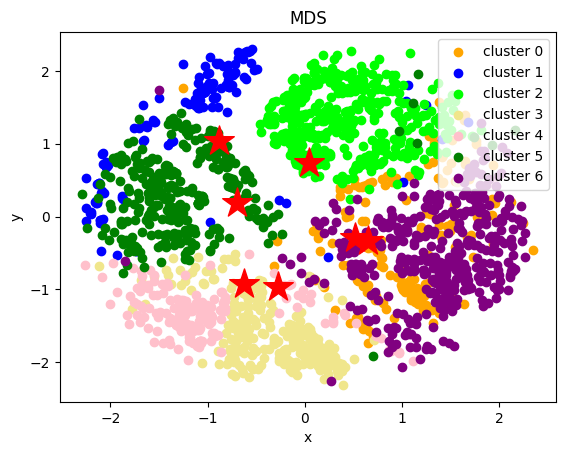

In [66]:
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:],
                       title='MDS')

I decided to try k=7 for my K means clustering. The MDS plot above shows the clusters are reasonable seperated (red starts representing clusterin centroids). Cluster 2 is tightly packed, which indicates high similarity within its points. Cluster 6 is more spread out, suggesting greater variation.
Cluster 0 and 4 also appear less compact, showing more diverse data points. Cluster 6 and 0 is an example of clusters with some overlap, meaning they may share similar features. k = 7 is probably not optimal

In [67]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


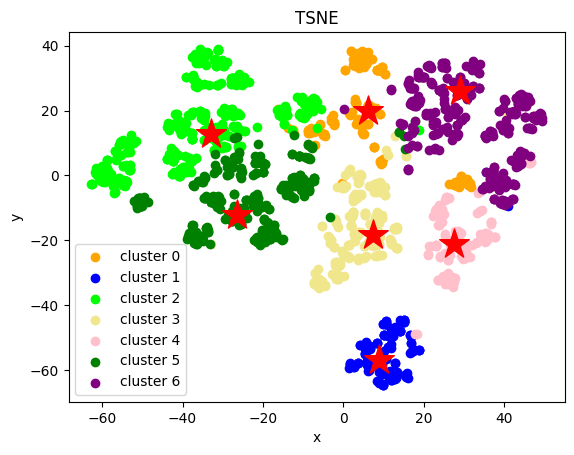

In [68]:
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:],
                       title='TSNE')

TSNE plot done with k = 7 too. Clusters are well-separated here suggesting k = 7 is a reasonable choice.
It shows compact clusters, with clearer groupings than MDS.
Some clusters slightly overlap, suggesting some similarities between them.


In [74]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


# Task 3

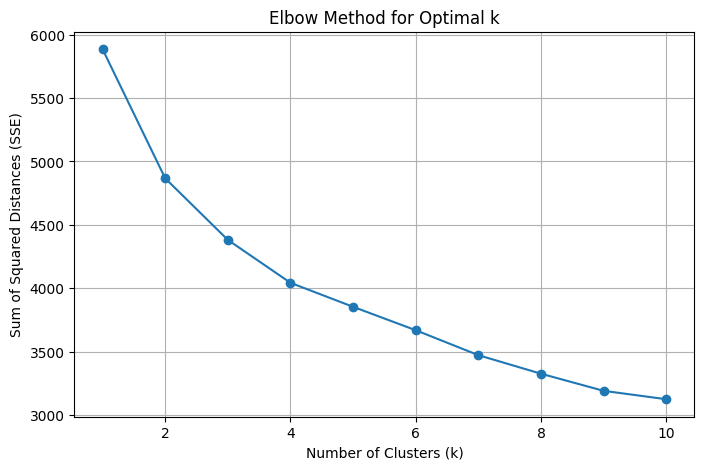

In [69]:
sse = []  # Store sum of squared errors
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)  # Sum of squared distances

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

To determine the optimal number of clusters k, I used the Elbow Method, which plots the sum of squared distances (SSE) from data points to their nearest cluster centers. The goal is to find the "elbow point" where adding more clusters no longer significantly reduces the SSE, indicating an optimal balance between compactness and separation of clusters.




The SSE decreases sharply from k=1 to k=4, suggesting that more clusters significantly improve the fit.
After k=4, the rate of decrease slows down, indicating diminishing returns beyond this point.
The "elbow" appears around k=4, which suggests that 4 clusters might be a better choice than k=7.


In [85]:
optimal_k = 4
clustered_data_sklearn = cluster.KMeans(n_clusters=optimal_k, n_init=10, max_iter=300, random_state=42).fit(data)

In [86]:
data_and_centers = np.r_[data, clustered_data_sklearn.cluster_centers_]

In [87]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("Transformation complete")

Transformation complete


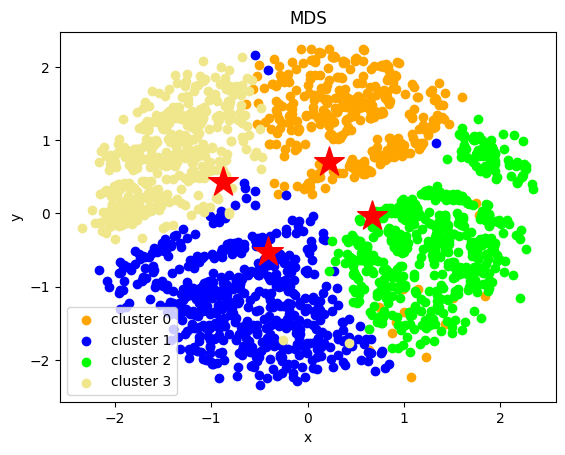

In [89]:
clustering_scatterplot(points=XYcoordinates[:-optimal_k,:],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-optimal_k:,:],
                       title='MDS')



Redoing the MDS plot for the 'optimal' value for k
Compared to k=7, some of the smaller clusters have now merged, forming larger, more generalised groups.
This suggests that k=4 provides a more interpretable segmentation while still maintaining strong differentiation between groups

In [90]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


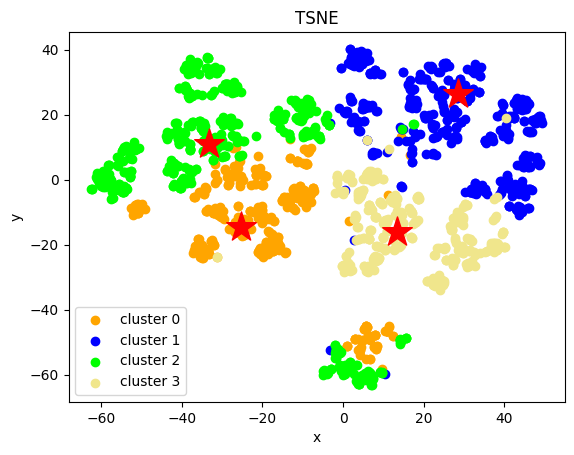

In [91]:
clustering_scatterplot(points=XYcoordinates[:-optimal_k,:],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-optimal_k:,:],
                       title='TSNE')

Redoing the MDS plot for the 'optimal' value for k.
Some clusters appear more compact, while others are slightly dispersed.
Unlike k=7, where there were more fragmented clusters, the k=4 solution provides fewer, but more well-defined groupings.
This supports the Elbow Methods recommendation that k=4 may be a more natural choice for this dataset.

Comparing k=4 vs. k=7

The Elbow Method suggested k=4, leading to fewer, larger clusters that may generalise better.
k=7 captured finer details, producing more granular sub-groups.
k=4 creates more distinct, interpretable clusters, while k=7 offers more detailed segmentation.
The best choice of k would really depende on whether the goal is generalised clusters (k=4) or fine-grained segmentation (k=7).

# Task 4

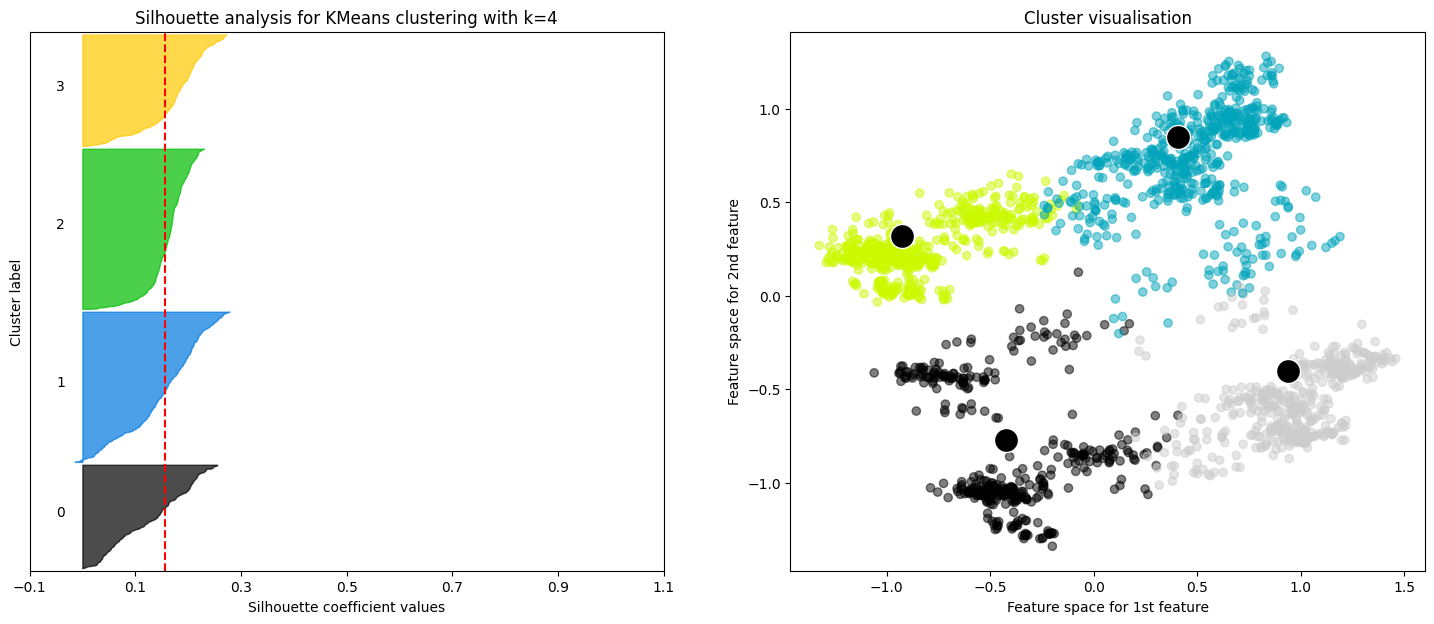

In [103]:
def plot_silhouette_analysis(data, optimal_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Silhouette analysis
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (optimal_k + 1) * 10])

    # K-Means wiht optimal k (4)
    kmeans = KMeans(n_clusters=optimal_k, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    sample_silhouette_values = silhouette_samples(data, labels)

    y_lower = 10
    for i in range(optimal_k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / optimal_k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette analysis for KMeans clustering with k={optimal_k}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    #  Cluster visualization

    reduced_data = PCA(n_components=2).fit_transform(data)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap=cm.nipy_spectral, alpha=0.5)
    centers = kmeans.cluster_centers_
    centers_pca = PCA(n_components=2).fit_transform(centers)
    ax2.scatter(centers_pca[:, 0], centers_pca[:, 1], marker="o", c="black", s=300, edgecolor="white")

    for i, c in enumerate(centers_pca):
        ax2.text(c[0], c[1], str(i), fontsize=15, weight="bold", color="black", ha="center", va="center")

    ax2.set_title("Cluster visualisation")
    ax2.set_xlabel("Feature space for 1st feature")
    ax2.set_ylabel("Feature space for 2nd feature")

    plt.show()
plot_silhouette_analysis(data, optimal_k)

The Silhouette Method measures how well data points fit within their clusters. A higher score means better-defined clusters, while lower values suggest overlap.

Left plot (Silhouette Scores):
The red dashed line shows the average silhouette score.
Blue and yellow clusters have higher scores, meaning they are well-separated.
The black cluster has a lower score, suggesting some overlap or weak separation.
Overall, k=4 is reasonable, but some points may be better clustered with a different k.


Right plot (PCA Cluster Visualisation):
Shows how clusters are distributed in two-dimensional space.
Confirms that while most clusters are distinct, some points are closely positioned, indicating possible overlap.

In conconclusion, both Elbow and Silhouette Methods support k=4.
However, Silhouette scores suggest that k=5 or k=6 might improve separation

# Task 5

In [101]:

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(data)


n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")


n_noise = np.sum(dbscan_labels == -1)
print(f"Number of noise points detected: {n_noise}")


Number of clusters found by DBSCAN: 15
Number of noise points detected: 1899


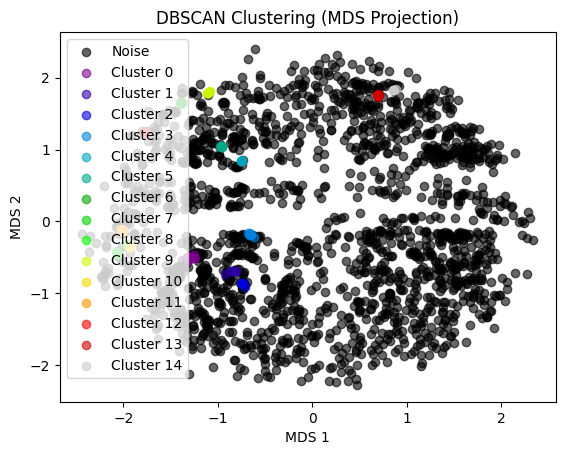

In [102]:
mds = manifold.MDS(n_components=2, random_state=42)
data_mds = mds.fit_transform(data)


def dbscan_scatterplot(points, labels, title):
    unique_labels = np.unique(labels)
    colors = cm.nipy_spectral(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        if label == -1:
            color = "black"
            label_name = "Noise"
        else:
            label_name = f"Cluster {label}"

        plt.scatter(points[labels == label, 0], points[labels == label, 1], c=[color], label=label_name, alpha=0.6)

    plt.title(title)
    plt.legend()
    plt.xlabel("MDS 1")
    plt.ylabel("MDS 2")
    plt.show()

# Visualise DBSCAN clusters using MDS
dbscan_scatterplot(data_mds, dbscan_labels, "DBSCAN Clustering (MDS Projection)")


The DBSCAN algorithm was applied to detect clusters based on density rather than a fixed number of groups (k). The MDS projection was used to visualise the clusters in a 2D space while preserving distance relationships.

Most points are classified as noise (black dots), meaning they do not fit into any clear cluster.
A few small, scattered clusters were detected, but they are much less structured than K-Means.
Unlike K-Means, DBSCAN does not assume cluster shapes, leading to more irregularly shaped groups.
The large number of noise points suggests that the dataset lacks strong density-based clustering patterns.

K-Means produced well-defined clusters with clear boundaries.
DBSCAN identified many noise points, indicating that it may not be the best fit for this dataset.
If denser clusters were present, DBSCAN would likely outperform K-Means in detecting natural groupings.
